Drawing a subset of data from biendata

In [24]:
import os, shutil, csv

In [25]:
#original_dataset_dir = '/Users/mithyyin/Documents/GitHub/TeamEve/Classfication_small_datasets_inception_v3/waste_original_dataset' #directory name of your biendata
original_dataset_dir =r'C:\Users\oscarscaro\Documents\GitHub\TeamEve\Classfication_small_datasets_inception_v3\images_withoutrect'
base_dir = './data_small' #create a directory for the data subset

#os.mkdir(base_dir)

#creating a new folder for each set
train_dir = os.path.join(base_dir, 'train') 
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
#os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
#os.mkdir(test_dir)

In [26]:
#making a folder for each category inside train folder
#there are 204 categories with ID 1..204

for i in range(1,205):
    train_categories_dir = os.path.join(train_dir, str(i))
    #os.mkdir(train_categories_dir)
    
for i in range(1,205):
    validation_categories_dir = os.path.join(validation_dir, str(i))
    #os.mkdir(validation_categories_dir)
    
for i in range(1,205):
    test_categories_dir = os.path.join(test_dir,str(i))
    #os.mkdir(test_categories_dir)

In [27]:
#importing csv files, and change it into a list

with open('train.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

In [28]:
data.pop(0)

['category_id', 'image_id', 'file_name']

In [29]:
print(data[i][1])
print(len(data))


11739
80000


In [30]:
#rewritten code number 2
for i in range(1,205):
    directory = os.path.join(original_dataset_dir,str(i))
    
    fnames = []
    for i in len(data)
        fnames.append(data[i][1])
    
    for fname in os.listdir(directory):
        #src = os.path.join(original_dataset_dir, fname) 
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(fname, dst)

SyntaxError: invalid syntax (<ipython-input-30-e2c930becaa8>, line 6)

In [31]:
#rewritten code fort iterating over a datasets
import os

#directory = os.fsencode('waste_original_dataset')

#for category in os.listdir(directory):
for i in range(1,205):
    count1 = 0
    file = os.path.join(original_dataset_dir, str(i))
    #fnames = ['cat.{}.jpg'.format(i) for i in data[i][1]]
    #training
    if i == 36:
        continue
    if i == 96:
        continue
    if i == 121:
        continue
    if i == 147:
        continue
    if i == 174:
        continue
    if i == 175: 
        continue
    for fname in os.listdir(file):
        if count1 <= 100:
            src = os.path.join(file, fname)
            file_path = os.path.join(train_dir,str(i))
            dst = os.path.join(file_path, fname)
            shutil.copyfile(src, dst)
            count1 += 1
        if count1 > 100 and count1<=150:
            src = os.path.join(file, fname)
            file_path = os.path.join(validation_dir,str(i))
            dst = os.path.join(file_path, fname)
            shutil.copyfile(src, dst)
            count1 += 1
        if count1 > 150 and count1<=200:
            src = os.path.join(file, fname)
            file_path = os.path.join(test_dir,str(i))
            dst = os.path.join(file_path, fname)
            shutil.copyfile(src, dst)
            count1 += 1

In [32]:
#checking if it is indeed the amount
print('total training images:', len(os.listdir(train_cats_dir)))

NameError: name 'train_cats_dir' is not defined

Training model building

In [33]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.engine import Input, Model
from keras.optimizers import SGD
from keras.callbacks import Callback, LearningRateScheduler, ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras.backend as K
import json
import time
import keras

In [34]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, enable=True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


RuntimeError: Physical devices cannot be modified after being initialized

As of keras 2, the module keras.layers.merge doesn't have a generic public Merge-Layer. Instead you are supposed to import the subclasses like keras.layers.Add or keras.layers.Concatenate etc. directly (or their functional interfaces with the same names lowercase: keras.layers.add, keras.layers.concatenate etc.).

In [35]:
#complete building function of Resnet x Inception v2
# we reduce # filters by factor of 8 compared to original inception-v4
nb_filters_reduction_factor = 8

def inception_resnet_v2_stem(x):
    # in original inception-resnet-v2, conv stride is 2
    x = Convolution2D(32//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    x = Convolution2D(32//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    x = Convolution2D(64//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    # in original inception-resnet-v2, stride is 2
    a = MaxPooling2D((3, 3), strides=(1, 1), padding='valid', data_format="channels_last")(x)
    # in original inception-resnet-v2, conv stride is 2
    b = Convolution2D(96//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
   # x = merge([a, b], mode='concat', concat_axis=-1)
    x = keras.layers.concatenate([a,b],axis=-1)
    
    a = Convolution2D(64//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    a = Convolution2D(96//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(a)
    b = Convolution2D(64//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(64//nb_filters_reduction_factor, (7, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(64//nb_filters_reduction_factor, (1, 7), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(96//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(b)
    x = keras.layers.concatenate([a,b],axis=-1)
    
    # in original inception-resnet-v2, conv stride should be 2
    a = Convolution2D(192//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    # in original inception-resnet-v2, stride is 2
    b = MaxPooling2D((3, 3), strides=(1, 1), padding='valid', data_format="channels_last")(x)
    x = keras.layers.concatenate([a,b],axis=-1)
    
    x = Activation('relu')(x)
    return x

def inception_resnet_v2_A(x):
    shortcut = x
    
    a = Convolution2D(32//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    b = Convolution2D(32//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(32//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    
    c = Convolution2D(32//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    c = Convolution2D(48//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(c)
    c = Convolution2D(64//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(c)
    
    x = keras.layers.concatenate([a,b,c],axis=-1)
    x = Convolution2D(384//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='linear',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    #x = merge([shortcut, x], mode='sum')
    x = keras.layers.add([shortcut,x])
    x = Activation('relu')(x)
    
    return x

def inception_resnet_v2_reduction_A(x):
    a = MaxPooling2D((3, 3), strides=(2, 2), padding='valid', data_format="channels_last")(x)
    b = Convolution2D(384//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    c = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    c = Convolution2D(256//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(c)
    c = Convolution2D(384//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(c)
    
    x = keras.layers.concatenate([a,b,c],axis=-1)
    
    return x
    

def inception_resnet_v2_B(x):
    shortcut = x
    
    a = Convolution2D(192//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    b = Convolution2D(128//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(160//nb_filters_reduction_factor, (1, 7), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(192//nb_filters_reduction_factor, (7, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    
    x = keras.layers.concatenate([a,b],axis=-1)
    x = Convolution2D(1154//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='linear',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    #x = merge([shortcut, x], mode='sum')
    x = keras.layers.add([shortcut,x])
    x = Activation('relu')(x)
    
    return x

def inception_resnet_v2_reduction_B(x):
    a = MaxPooling2D((3, 3), strides=(2, 2), padding='valid', data_format="channels_last")(x)
    b = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(288//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(b)
    c = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    c = Convolution2D(288//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(c)
    d = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    d = Convolution2D(288//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(d)
    d = Convolution2D(320//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(d)
    
    x = keras.layers.concatenate([a,b,c,d],axis=-1)
    
    return x


def inception_resnet_v2_C(x):
    shortcut = x
    
    a = Convolution2D(192//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    b = Convolution2D(192//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(224//nb_filters_reduction_factor, (1, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(256//nb_filters_reduction_factor, (3, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    
    x = keras.layers.concatenate([a,b],axis=-1)
    x = Convolution2D(2048//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='linear',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
   # x = merge([shortcut, x], mode='sum')
    x = keras.layers.add([shortcut,x])
    x = Activation('relu')(x)
    
    return x

In [36]:
img_rows, img_cols = 100, 100
img_channels = 3

nb_classes = 204

# in original inception-resnet-v2, these are 5, 10, 5, respectively
num_A_blocks = 1
num_B_blocks = 1
num_C_blocks = 1

inputs = Input(shape=(img_rows, img_cols, img_channels))

x = inception_resnet_v2_stem(inputs)
for i in range(num_A_blocks):
    x = inception_resnet_v2_A(x)
x = inception_resnet_v2_reduction_A(x)
for i in range(num_B_blocks):
    x = inception_resnet_v2_B(x)
x = inception_resnet_v2_reduction_B(x)
for i in range(num_C_blocks):
    x = inception_resnet_v2_C(x)

x = AveragePooling2D(pool_size=(4, 4), strides=(1, 1), padding='valid', data_format="channels_last")(x)
x = Dropout(0.5)(x)
x = Flatten()(x)

predictions = Dense(nb_classes, activation='softmax')(x)

model = Model(input=inputs, output=predictions)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [37]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 98, 98, 4)    112         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 96, 96, 4)    148         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 96, 96, 8)    296         conv2d_2[0][0]                   
____________________________________________________________________________________________

In [38]:
model.compile(optimizer='adam',  #optimizer=optimizers.RMSprop(lr=2e-5), could also try that
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [39]:
#setting up all the parameter for training
batch_size = 16 #try 32, 128
epoch = 100 # try 50, 100. 
data_augmentation = True

# preprocessing the data

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

In [40]:
import os
base_dir = './data_small'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

In [41]:
#preprocessing the data implementation
#using data implementation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

#changed here, major changes
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #train_dir is the path where you store all the validaiton folder, chnage this
    target_size = (100,100), #try 1920,1080
    batch_size = batch_size,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory( #debug here
    validation_dir, #train_dir is the path where you store all the validation folder, change this
    target_size = (100,100),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 19998 images belonging to 204 classes.
Found 9900 images belonging to 204 classes.


In [42]:
# saving the best model
# checkpoint
#from keras.callbacks import TensorBoard

filepath="waste_sort_weights_best_updated.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#using tensorboard
callbacks_list = [keras.callbacks.TensorBoard(
    log_dir = 'my_log_dir',
    histogram_freq=0, #records activation histogram every 1 epoch
    embeddings_freq=0,
    write_graph=True,
    write_images=True#recoding embedding data every 1 epoch
                                             ),checkpoint]

#not using tensorboard
callbacks_list2 = [checkpoint]

In [43]:
#training the model, fit the data
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=epoch,
validation_data=validation_generator,
validation_steps=50,
callbacks = callbacks_list2) #change here

Epoch 1/100
100/100 [==============================] - 38s 376ms/step - loss: 5.4648 - accuracy: 0.0088 - val_loss: 5.0904 - val_accuracy: 0.0075

Epoch 00001: val_accuracy improved from -inf to 0.00750, saving model to waste_sort_weights_best_updated.h5
Epoch 2/100
100/100 [==============================] - 34s 340ms/step - loss: 5.2040 - accuracy: 0.0069 - val_loss: 5.1480 - val_accuracy: 0.0075

Epoch 00002: val_accuracy did not improve from 0.00750
Epoch 3/100
100/100 [==============================] - 38s 382ms/step - loss: 5.1139 - accuracy: 0.0250 - val_loss: 5.4436 - val_accuracy: 0.0200

Epoch 00003: val_accuracy improved from 0.00750 to 0.02000, saving model to waste_sort_weights_best_updated.h5
Epoch 4/100
100/100 [==============================] - 38s 380ms/step - loss: 4.9932 - accuracy: 0.0269 - val_loss: 4.8464 - val_accuracy: 0.0350

Epoch 00004: val_accuracy improved from 0.02000 to 0.03500, saving model to waste_sort_weights_best_updated.h5
Epoch 5/100
100/100 [======

100/100 [==============================] - 40s 396ms/step - loss: 1.6662 - accuracy: 0.5619 - val_loss: 3.5512 - val_accuracy: 0.3487

Epoch 00036: val_accuracy did not improve from 0.44000
Epoch 37/100
100/100 [==============================] - 43s 432ms/step - loss: 1.6985 - accuracy: 0.5456 - val_loss: 5.3597 - val_accuracy: 0.4025

Epoch 00037: val_accuracy did not improve from 0.44000
Epoch 38/100
100/100 [==============================] - 44s 443ms/step - loss: 1.5793 - accuracy: 0.5894 - val_loss: 3.4413 - val_accuracy: 0.4133

Epoch 00038: val_accuracy did not improve from 0.44000
Epoch 39/100
100/100 [==============================] - 43s 432ms/step - loss: 1.6095 - accuracy: 0.5682 - val_loss: 1.7308 - val_accuracy: 0.4475

Epoch 00039: val_accuracy improved from 0.44000 to 0.44750, saving model to waste_sort_weights_best_updated.h5
Epoch 40/100
100/100 [==============================] - 40s 396ms/step - loss: 1.5333 - accuracy: 0.5981 - val_loss: 2.2531 - val_accuracy: 0.322


Epoch 00074: val_accuracy did not improve from 0.63750
Epoch 75/100
100/100 [==============================] - 55s 548ms/step - loss: 0.8305 - accuracy: 0.7563 - val_loss: 2.1536 - val_accuracy: 0.4937

Epoch 00075: val_accuracy did not improve from 0.63750
Epoch 76/100
100/100 [==============================] - 54s 535ms/step - loss: 0.8628 - accuracy: 0.7625 - val_loss: 2.2413 - val_accuracy: 0.4387

Epoch 00076: val_accuracy did not improve from 0.63750
Epoch 77/100
100/100 [==============================] - 53s 535ms/step - loss: 0.7473 - accuracy: 0.7812 - val_loss: 1.7260 - val_accuracy: 0.5750

Epoch 00077: val_accuracy did not improve from 0.63750
Epoch 78/100
100/100 [==============================] - 53s 535ms/step - loss: 0.7642 - accuracy: 0.7919 - val_loss: 0.7153 - val_accuracy: 0.5138

Epoch 00078: val_accuracy did not improve from 0.63750
Epoch 79/100
100/100 [==============================] - 53s 534ms/step - loss: 0.8054 - accuracy: 0.7656 - val_loss: 3.1861 - val_ac

In [66]:
#save the last epoch of the model 
model.save('wastesorting_resnet_inception_v2.h5') #model checkpoints for the last epoch

In [95]:
from keras.models import load_model
model = load_model('wastesorting_resnet_inception_v2.h5')

In [ ]:
#predicting the results

# from keras.models import load_model
# model = load_model('waste_sort_weights_best.h5')

In [44]:
#this is from my mac, we had differnt version.
#import the model_weights
from keras.models import load_model

model.load_weights('wastesorting_resnet_inception_v2.h5')

model.compile(optimizer='adam',  #optimizer=optimizers.RMSprop(lr=2e-5), could also try that
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

# Testing that went fail


In [109]:
#Compiling a test for the model

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\oscarscaro\Documents\GitHub\TeamEve\Classfication_small_datasets_inception_v3\images_withoutrect\3\12228.jpg'

img = image.load_img(img_path, target_size=(100,100)) #target size
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x /= 255. #don't forget this shit brother

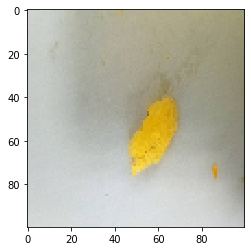

In [128]:
import matplotlib.pyplot as plt

plt.imshow(x[0])
plt.show()

In [129]:
images = np.vstack([x])

classes = model.predict(x)
y_classes = classes.argmax(axis=-1)
#print(classes)
print(y_classes)


[89]


# Real work down below

In [81]:
import csv
import json
from keras.preprocessing.image import ImageDataGenerator

headers=['id', 'label']
cat_temp={0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 
          10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 
          20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 
          30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 37, 36: 38, 37: 39, 38: 40, 39: 41, 
          40: 42, 41: 43, 42: 44, 43: 45, 44: 46, 45: 47, 46: 48, 47: 49, 48: 50, 49: 51, 
          50: 52, 51: 53, 52: 54, 53: 55, 54: 56, 55: 57, 56: 58, 57: 59, 58: 60, 59: 61, 
          60: 62, 61: 63, 62: 64, 63: 65, 64: 66, 65: 67, 66: 68, 67: 69, 68: 70, 69: 71, 
          70: 72, 71: 73, 72: 74, 73: 75, 74: 76, 75: 77, 76: 78, 77: 79, 78: 80, 79: 81, 
          80: 82, 81: 83, 82: 84, 83: 85, 84: 86, 85: 87, 86: 88, 87: 89, 88: 90, 89: 91, 
          90: 92, 91: 93, 92: 94, 93: 95, 94: 97, 95: 98, 96: 99, 97: 100, 98: 101, 99: 102, 
          100: 103, 101: 104, 102: 105, 103: 106, 104: 107, 105: 108, 106: 109, 107: 110, 108: 111, 109: 112, 
          110: 113, 111: 114, 112: 115, 113: 116, 114: 117, 115: 118, 116: 119, 117: 120, 118: 122, 119: 123, 
          120: 124, 121: 125, 122: 126, 123: 127, 124: 128, 125: 129, 126: 130, 127: 131, 128: 132, 129: 133, 
          130: 134, 131: 135, 132: 136, 133: 137, 134: 138, 135: 139, 136: 140, 137: 141, 138: 142, 139: 143, 
          140: 144, 141: 145, 142: 146, 143: 148, 144: 149, 145: 150, 146: 151, 147: 152, 148: 153, 149: 154, 
          150: 155, 151: 156, 152: 157, 153: 158, 154: 159, 155: 160, 156: 161, 157: 162, 158: 163, 159: 164, 
          160: 165, 161: 166, 162: 167, 163: 168, 164: 169, 165: 170, 166: 171, 167: 172, 168: 173, 169: 176, 
          170: 177, 171: 178, 172: 179, 173: 180, 174: 181, 175: 182, 176: 183, 177: 184, 178: 185, 179: 186, 
          180: 187, 181: 188, 182: 189, 183: 190, 184: 191, 185: 192, 186: 193, 187: 194, 188: 195, 189: 196, 
          190: 197, 191: 198, 192: 199, 193: 200, 194: 201, 195: 202, 196: 203, 197: 204}

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(229, 229),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)
test_generator.reset()

pred = model.predict_generator(test_generator, verbose=1)
with open('test.csv', mode='w', newline='') as f1:
    f1_writer=csv.writer(f1, headers)
    f1_writer.writerow(headers)
    # f1_writer.writerow([''] + range(1000000))
    for i in range(100):
        #print(item)
        likeliness=pred[i].tolist()
        print(test_generator.filenames[i][2:14]+' '+str(cat_temp[likeliness.index(max(pred[i]))])+' '+str(max(likeliness)))
        f1_writer.writerow([
            test_generator.filenames[i][2:14],
            cat_temp[likeliness.index(max(pred[i]))]
        ])

Found 100 images belonging to 1 classes.
100/100 [==============================] - 6s 56ms/step
000f0e3a30ea 114 0.9799569845199585
00a2bdf5c7c9 92 0.3884976804256439
00a54f56e137 30 0.5228327512741089
00aa6dcc3401 43 0.8356646299362183
00aeb267a6d6 87 0.9710210561752319
00aefdcb0543 4 0.5418986678123474
00aff96fa05d 115 0.5269193649291992
00b0c9dbaf8d 112 0.5582687854766846
00c72f58943b 28 0.279292494058609
00ca17f5838d 46 0.9543931484222412
00d2ef71123d 94 0.5710656642913818
00d5bc1242a4 59 0.9999995231628418
00de2800f477 118 0.8259161114692688
00e3fcbf059c 181 0.7111508846282959
00e9c4b3d491 166 0.4722172021865845
00ea9b65bcac 33 0.8132795691490173
00ec40a77bd0 69 0.4924282729625702
00f0b47e1ffb 156 0.9974645376205444
00f0fa8f4aed 134 0.7727859020233154
00fb5604291a 61 0.4785296618938446
00fe0c1c4812 169 0.5067659020423889
00ff841529f9 20 0.8055550456047058
0a03d9315b84 18 0.31686750054359436
0a0e20a64a0b 148 0.5481390357017517
0a1afde2f6ae 48 0.3789580464363098
0a228829a14d 103 0.

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = os.path.join(base_dir, 'test') 

#test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(100,100),
batch_size=1,
class_mode='categorical',
shuffle=False)


Found 9899 images belonging to 204 classes.


In [52]:
test_loss,test_acc = model.evaluate_generator(test_generator)


In [53]:
print('test acc:',test_acc)
print('test loss:',test_loss)

test acc: 0.5791494250297546
test loss: 0.01624361239373684


In [115]:
#retest using calibrated generator

test_generator.reset()
pred = model.predict_generator(test_generator,verbose=1)

9899/9899 [==============================] - 162s 16ms/step


In [119]:
predicted_class_indices = np.argmax(pred,axis=-1)
labels = (train_generator.class_indices) 
label = dict((v,k) for k,v in labels.items())

In [120]:
predictions = [label[i] for i in predicted_class_indices]

In [130]:
filenames = test_generator.filenames
for idx in range(len(filenames)):
    print('predict %d:'% (int(predictions[idx])))
    print('title %s:' % filenames[idx])
    print('')

predict 1:
title 1\11681.jpg:

predict 18:
title 1\11682.jpg:

predict 8:
title 1\11683.jpg:

predict 18:
title 1\11684.jpg:

predict 1:
title 1\11685.jpg:

predict 18:
title 1\11686.jpg:

predict 1:
title 1\11687.jpg:

predict 1:
title 1\11688.jpg:

predict 6:
title 1\11689.jpg:

predict 63:
title 1\11690.jpg:

predict 18:
title 1\11691.jpg:

predict 18:
title 1\11692.jpg:

predict 8:
title 1\11693.jpg:

predict 30:
title 1\11694.jpg:

predict 164:
title 1\11695.jpg:

predict 8:
title 1\11696.jpg:

predict 21:
title 1\11697.jpg:

predict 63:
title 1\11698.jpg:

predict 18:
title 1\11699.jpg:

predict 8:
title 1\11700.jpg:

predict 8:
title 1\11702.jpg:

predict 20:
title 1\11703.jpg:

predict 20:
title 1\11704.jpg:

predict 6:
title 1\11706.jpg:

predict 1:
title 1\11707.jpg:

predict 11:
title 1\11708.jpg:

predict 1:
title 1\11709.jpg:

predict 61:
title 1\11710.jpg:

predict 61:
title 1\11711.jpg:

predict 164:
title 1\11712.jpg:

predict 63:
title 1\11713.jpg:

predict 8:
title 1\


predict 199:
title 118\286489.jpg:

predict 152:
title 119\55975.jpg:

predict 122:
title 119\55977.jpg:

predict 89:
title 119\55978.jpg:

predict 76:
title 119\55979.jpg:

predict 122:
title 119\55980.jpg:

predict 119:
title 119\55981.jpg:

predict 119:
title 119\55984.jpg:

predict 152:
title 119\55985.jpg:

predict 73:
title 119\55986.jpg:

predict 189:
title 119\55987.jpg:

predict 122:
title 119\55989.jpg:

predict 111:
title 119\55991.jpg:

predict 119:
title 119\55992.jpg:

predict 119:
title 119\55993.jpg:

predict 101:
title 119\55994.jpg:

predict 119:
title 119\55995.jpg:

predict 119:
title 119\55997.jpg:

predict 122:
title 119\55999.jpg:

predict 189:
title 119\56000.jpg:

predict 119:
title 119\56001.jpg:

predict 119:
title 119\56002.jpg:

predict 76:
title 119\56004.jpg:

predict 98:
title 119\56005.jpg:

predict 111:
title 119\56006.jpg:

predict 152:
title 119\56007.jpg:

predict 119:
title 119\56008.jpg:

predict 82:
title 119\56009.jpg:

predict 122:
title 119\5

predict 17:
title 138\268286.jpg:

predict 189:
title 138\268287.jpg:

predict 62:
title 138\268288.jpg:

predict 128:
title 138\268289.jpg:

predict 203:
title 138\268290.jpg:

predict 129:
title 138\268291.jpg:

predict 189:
title 138\268292.jpg:

predict 189:
title 138\268293.jpg:

predict 62:
title 138\268294.jpg:

predict 189:
title 138\268295.jpg:

predict 138:
title 138\268296.jpg:

predict 150:
title 138\268297.jpg:

predict 189:
title 138\268298.jpg:

predict 138:
title 138\268300.jpg:

predict 138:
title 138\268301.jpg:

predict 84:
title 138\268302.jpg:

predict 138:
title 138\268305.jpg:

predict 138:
title 138\268306.jpg:

predict 189:
title 138\268308.jpg:

predict 189:
title 138\268311.jpg:

predict 189:
title 138\268312.jpg:

predict 17:
title 138\268313.jpg:

predict 138:
title 138\268316.jpg:

predict 138:
title 138\268317.jpg:

predict 189:
title 138\268318.jpg:

predict 154:
title 138\268319.jpg:

predict 129:
title 138\268320.jpg:

predict 78:
title 139\301202.jpg:

title 16\284532.jpg:

predict 34:
title 16\284533.jpg:

predict 101:
title 16\284534.jpg:

predict 63:
title 16\284535.jpg:

predict 101:
title 16\284536.jpg:

predict 162:
title 16\284537.jpg:

predict 162:
title 16\284538.jpg:

predict 162:
title 16\284539.jpg:

predict 101:
title 16\284540.jpg:

predict 63:
title 16\284542.jpg:

predict 34:
title 16\284543.jpg:

predict 170:
title 160\287256.jpg:

predict 26:
title 160\287257.jpg:

predict 170:
title 160\287258.jpg:

predict 170:
title 160\287260.jpg:

predict 170:
title 160\287261.jpg:

predict 170:
title 160\287262.jpg:

predict 164:
title 160\287263.jpg:

predict 167:
title 160\287264.jpg:

predict 170:
title 160\287265.jpg:

predict 165:
title 160\287269.jpg:

predict 167:
title 160\287270.jpg:

predict 53:
title 160\287271.jpg:

predict 167:
title 160\287272.jpg:

predict 164:
title 160\287274.jpg:

predict 169:
title 160\287275.jpg:

predict 167:
title 160\287276.jpg:

predict 25:
title 160\287277.jpg:

predict 25:
title 160\2

predict 24:
title 183\251753.jpg:

predict 183:
title 183\251754.jpg:

predict 183:
title 183\251755.jpg:

predict 183:
title 183\251756.jpg:

predict 183:
title 183\251757.jpg:

predict 76:
title 183\251758.jpg:

predict 183:
title 183\251759.jpg:

predict 106:
title 183\251760.jpg:

predict 183:
title 183\251761.jpg:

predict 183:
title 183\251762.jpg:

predict 183:
title 183\251763.jpg:

predict 183:
title 183\251764.jpg:

predict 183:
title 183\251765.jpg:

predict 183:
title 183\251766.jpg:

predict 183:
title 183\251767.jpg:

predict 183:
title 183\251769.jpg:

predict 183:
title 183\251770.jpg:

predict 183:
title 183\251771.jpg:

predict 183:
title 183\251772.jpg:

predict 183:
title 183\251773.jpg:

predict 183:
title 183\251774.jpg:

predict 183:
title 183\251775.jpg:

predict 183:
title 183\251776.jpg:

predict 183:
title 183\251777.jpg:

predict 183:
title 183\251778.jpg:

predict 183:
title 183\251780.jpg:

predict 189:
title 183\251781.jpg:

predict 200:
title 183\251782.

title 203\172064.jpg:

predict 203:
title 203\172066.jpg:

predict 203:
title 203\172067.jpg:

predict 86:
title 203\172068.jpg:

predict 165:
title 203\172069.jpg:

predict 203:
title 203\172070.jpg:

predict 170:
title 203\172072.jpg:

predict 203:
title 203\172073.jpg:

predict 170:
title 203\172075.jpg:

predict 71:
title 203\172076.jpg:

predict 170:
title 203\172077.jpg:

predict 203:
title 203\172078.jpg:

predict 203:
title 203\172079.jpg:

predict 203:
title 203\172080.jpg:

predict 203:
title 203\172081.jpg:

predict 128:
title 203\172082.jpg:

predict 203:
title 203\172083.jpg:

predict 85:
title 203\172084.jpg:

predict 203:
title 203\172085.jpg:

predict 165:
title 203\172086.jpg:

predict 203:
title 203\172087.jpg:

predict 176:
title 203\172088.jpg:

predict 203:
title 203\172089.jpg:

predict 203:
title 203\172090.jpg:

predict 165:
title 203\172091.jpg:

predict 203:
title 203\172092.jpg:

predict 203:
title 203\172093.jpg:

predict 18:
title 204\31882.jpg:

predict 20

predict 192:
title 41\173989.jpg:

predict 28:
title 41\173990.jpg:

predict 192:
title 41\173992.jpg:

predict 136:
title 41\173993.jpg:

predict 136:
title 41\173994.jpg:

predict 34:
title 41\173996.jpg:

predict 34:
title 41\173997.jpg:

predict 136:
title 41\173998.jpg:

predict 192:
title 41\174000.jpg:

predict 87:
title 41\174001.jpg:

predict 87:
title 42\191524.jpg:

predict 106:
title 42\191525.jpg:

predict 101:
title 42\191527.jpg:

predict 101:
title 42\191528.jpg:

predict 185:
title 42\191530.jpg:

predict 185:
title 42\191533.jpg:

predict 101:
title 42\191534.jpg:

predict 101:
title 42\191535.jpg:

predict 101:
title 42\191536.jpg:

predict 101:
title 42\191537.jpg:

predict 101:
title 42\191538.jpg:

predict 101:
title 42\191539.jpg:

predict 101:
title 42\191541.jpg:

predict 101:
title 42\191542.jpg:

predict 101:
title 42\191543.jpg:

predict 101:
title 42\191544.jpg:

predict 185:
title 42\191545.jpg:

predict 185:
title 42\191546.jpg:

predict 101:
title 42\191

title 63\24859.jpg:

predict 63:
title 63\24860.jpg:

predict 63:
title 63\24861.jpg:

predict 170:
title 63\24862.jpg:

predict 63:
title 63\24863.jpg:

predict 63:
title 63\24864.jpg:

predict 63:
title 63\24865.jpg:

predict 63:
title 63\24866.jpg:

predict 63:
title 63\24867.jpg:

predict 63:
title 63\24868.jpg:

predict 63:
title 63\24869.jpg:

predict 63:
title 63\24870.jpg:

predict 170:
title 63\24871.jpg:

predict 170:
title 63\24872.jpg:

predict 63:
title 63\24873.jpg:

predict 63:
title 63\24875.jpg:

predict 63:
title 63\24876.jpg:

predict 63:
title 63\24877.jpg:

predict 34:
title 63\24878.jpg:

predict 63:
title 63\24879.jpg:

predict 63:
title 63\24880.jpg:

predict 63:
title 63\24881.jpg:

predict 51:
title 63\24882.jpg:

predict 34:
title 63\24883.jpg:

predict 63:
title 63\24884.jpg:

predict 63:
title 63\24885.jpg:

predict 63:
title 63\24886.jpg:

predict 63:
title 63\24888.jpg:

predict 63:
title 63\24889.jpg:

predict 34:
title 63\24890.jpg:

predict 170:
title 

predict 91:
title 84\174925.jpg:

predict 84:
title 84\174927.jpg:

predict 84:
title 84\174928.jpg:

predict 111:
title 84\174930.jpg:

predict 84:
title 84\174932.jpg:

predict 84:
title 84\174933.jpg:

predict 111:
title 84\174934.jpg:

predict 84:
title 84\174935.jpg:

predict 84:
title 84\174937.jpg:

predict 84:
title 84\174938.jpg:

predict 76:
title 84\174939.jpg:

predict 84:
title 84\174940.jpg:

predict 76:
title 84\174941.jpg:

predict 152:
title 84\174942.jpg:

predict 91:
title 84\174943.jpg:

predict 77:
title 84\174944.jpg:

predict 76:
title 84\174945.jpg:

predict 84:
title 84\174946.jpg:

predict 84:
title 84\174947.jpg:

predict 91:
title 84\174948.jpg:

predict 154:
title 84\174951.jpg:

predict 78:
title 84\174953.jpg:

predict 91:
title 84\174954.jpg:

predict 91:
title 84\174955.jpg:

predict 78:
title 84\174956.jpg:

predict 77:
title 84\174957.jpg:

predict 189:
title 84\174958.jpg:

predict 85:
title 85\36323.jpg:

predict 85:
title 85\36324.jpg:

predict 99:

In [ ]:
#preprocess 100 output

from PIL import Image

testdir = r'C:\Users\oscarscaro\Desktop\Mini_test'

mylist = []
for i in range(1,101):
     st_img_x = testdir + ('00' + str(i))[-3:] + '.jpg'
     #st_img_x = testdir + '\' + ('0' + str(i))[-3:] + '.jpg'
     img_pil_1 = Image.open(st_img_x)
     img_pil_150 = img_pil_1.resize((150,150))
     img_np_150 = np.asarray(img_pil_150)
     img_np_150 = img_np_150.astype('float32')
     img_np_150 = img_np_150/255 # normalized to [0,1]
     img_np_150_rsh = img_np_150.reshape(1,150,150,3)
     mylist.append(model.predict(img_np_150_rsh)[0])
myarr = np.rint(np.array(mylist).flatten()).astype(int)

In [190]:
from PIL import Image

testdir = r'C:\Users\oscarscaro\Desktop\Mini_test'

mylist = []


for i in range(1,101):
    # st_img_x = testdir + ('00' + str(i))[-3:] + '.jpg'
     x = ('00' + str(i))[-3:] + '.jpg'
     st_img_x = os.path.join(testdir,x)
     img_pil_1 = Image.open(st_img_x)
     img_pil_150 = img_pil_1.resize((100,100))
     img_np_150 = np.asarray(img_pil_150)
     img_np_150 = img_np_150.astype('float32')
     img_np_150 = img_np_150/255. # normalized to [0,1]
     img_np_150_rsh = img_np_150.reshape(1,100,100,3)
     mylist.append(model.predict(img_np_150_rsh)[0])

myarr = np.rint(np.array(mylist).flatten()).astype(int)


In [204]:
y_classes = mylist[99].argmax(axis=-1)
print(y_classes) 

76


# Running on new datasets

In [44]:
from keras.models import load_model
model = load_model('waste_sort_weights_best_updated.h5')

In [45]:
from keras.preprocessing.image import ImageDataGenerator

testdir = r'C:\Users\oscarscaro\Desktop\test'


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=testdir,
    target_size=(100,100),
    batch_size=16,
    class_mode=None,
    shuffle=False)

Found 50 images belonging to 1 classes.


In [46]:
import numpy as np

test_generator.reset()

pred = model.predict_generator(test_generator,verbose=1,steps=50/16)
predicted_class_indices = np.argmax(pred,axis=1)

4/3 [======================================] - 1s 197ms/step


In [47]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for  k in predicted_class_indices]

In [48]:
import pandas as pd

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                     "predictions":predictions})

In [49]:
results

,Filename,predictions
0,1\11681.jpg,1
1,1\11682.jpg,1
2,1\11683.jpg,1
3,1\11684.jpg,1
4,1\11685.jpg,1
5,1\11686.jpg,1
6,1\11687.jpg,30
7,1\11688.jpg,1
8,1\11689.jpg,63
9,1\11690.jpg,63
